# Assignment 2 : Credit card fraud detection

The credit card fraud detection assignment we discussed in our previous meeting. 
The assignment focuses on conducting a detailed exploratory data analysis (EDA) and modelling  using 
the "Credit Card Fraud Detection" dataset available on Kaggle.

Assignment Details:

 

Task: Perform an in-depth EDA and modeling  on the credit card fraud dataset.

Deadline: Sunday, 5 pm.

Evaluation: Your performance will be assessed during the Sunday evening meeting, where we will discuss the results and plan for the upcoming week.

 

Expectations:

 

I expect you to invest significant effort into this assignment, as it will demonstrate your analytical skills and provide practical experience in fraud detection analysis.

While the end result is important, I value your effort and commitment equally. Concentrate on thoroughly exploring the dataset, extracting meaningful insights, and documenting your analysis process.

 

Additionally, I want to offer you three important tips to handle the fraud detection problem in machine learning effectively:

 

Imbalanced Dataset Handling:
Address the imbalance between fraudulent and legitimate transactions in the dataset. Techniques like oversampling, undersampling, or using algorithms like SMOTE (Synthetic Minority Over-sampling Technique) can help balance the dataset and avoid biased model performance.
 

Feature Engineering:
Improve your fraud detection model by identifying and creating relevant features from the existing dataset. Explore techniques such as aggregating transaction data, creating time-based features, or deriving statistical measures from transaction amounts to capture meaningful patterns and anomalies.
 

Model Evaluation Metrics:
Use appropriate evaluation metrics for fraud detection, considering that standard classification metrics like accuracy might not be sufficient. Metrics such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC) provide better insights into your model's performance in correctly identifying fraud while minimizing false positives.
 

Remember to submit a comprehensive email documenting your observations, findings, and any challenges you faced during the analysis as your assignment submission.

 

If you have any questions or concerns about the assignment or the provided tips, please feel free to reach out to me. I am here to assist you and provide guidance throughout the process.

 

Best regards,

Anuj.

Import necessory libraries : 

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn import metrics

Import Dataset :

In [2]:
credit_df = pd.read_csv('creditcard.csv')

In [3]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


From Dataframe nothing is clear only **Time**, **Amount**, **Class** features understand.

In [5]:
credit_df.shape

(284807, 31)

This Data is having **284807 rows  & 31 columns**  data is large.

In [6]:
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Time** : the format of this column is doesn't understand it is in float datatype.
    
**Amount** : this is transaction amount in US dollars.
        
**Class** : whether the transaction is fraud or not. 
Here **0** ---> not fraud transaction and **1** --->fraud transaction
            

In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# minutes = seconds // 60

minutes  = 172792 // 60
hrs = 2879 // 60
days = 47 / 24


Looking at **Time** feature , Time is in second.

minutes = seconds // 60

minutes  = 172792 // 60
hrs = 2879 // 60
days = 47 / 24 == 2 days

means this data is 2 days data.

#### Univariate Analysis 

In [11]:
credit_df['Class'].nunique()

2

In [12]:
credit_df['Class'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:>

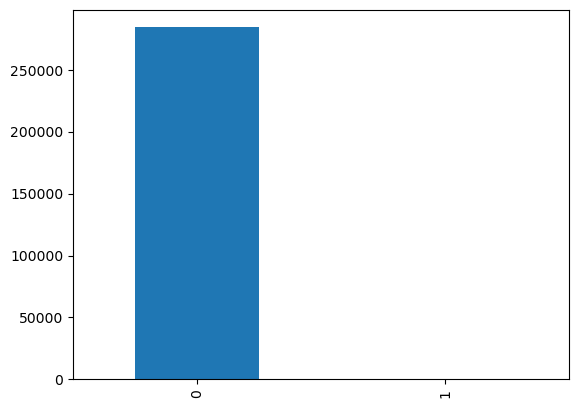

In [13]:
credit_df['Class'].value_counts().plot(kind = 'bar')

From above graph we clearly understand that this data is highly **Imbalance Data**.

In [14]:
Non_Fraud_transaction = credit_df[credit_df['Class'] == 0]

In [15]:
Fraud_transaction = credit_df[credit_df['Class'] == 1]

In [16]:
Non_Fraud_transaction.shape

(284315, 31)

In [17]:
Fraud_transaction.shape

(492, 31)

Here, Total transactions are **284807**
in that **284315** are Not Fraud transactions
**492** are Fraud transactions.


<AxesSubplot:xlabel='Class', ylabel='Time'>

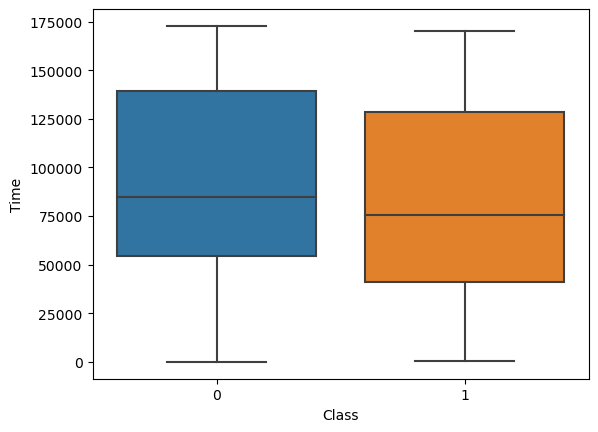

In [18]:
sns.boxplot(x = 'Class',y = 'Time',data = credit_df)

From above fig, we can say that after 125000 **(2083 minutes ,34 hrs,almost 1 day)** seconds there is no Fraud.

In [19]:
Non_Fraud_transaction['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Findings : From normal transctions **mean** transction amount is **88 USD** , From normal transctions **minimum** transction amount is **0 USD** and **maximum** transction amount is **25691 USD**

In [20]:
Fraud_transaction['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Findings : From Fraud transctions mean transction amount is **122 USD** , 
    From Fraud transctions minimum transction amount is **0 USD** and maximum transction amount is **2125 USD**

In [21]:
credit_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Findings : From above function, see the difference between mean of Class 0 (Non_Fraud_transaction) and 
    Class 1 (Fraud_transaction) is very High,
    
    eg: Class 0 - V1 = 0.008258 & Class 1 - V1 = -4.771948;
        Class 0 - V2 = -0.006271 & Class 1 - V2 = 3.623778;
        Class 0 - V3 = 0.012171 & Class 1 - V3 = -7.033281;.... so on
        
it is easy to our model to differ class.

# Handle Imbalance data

To handle Imbalance data there are two sampling techniques :

1. Under Sampling
2. Over Sampling

we are going to use Under Sampling because we have 284807 data in that  492 is in class 1 if we do Under sampling there will not load on our model,as we go for Over Sampling 284315 will add in this dataset and hard to model to predict due to huge data.

Now for Under Sampling we need to create a sample dataset from Non fraud tranctions which is random in nature.

In [22]:
Non_Fraud_transaction_sample = Non_Fraud_transaction.sample(n = 492)

Now we need to concate Non_Fraud_transaction_sample and Fraud_transaction so we are ready to built model

In [23]:
New_dataSet = pd.concat([Non_Fraud_transaction_sample,Fraud_transaction], axis = 0) # axis = 0 means added data ROW-WISE

In [24]:
New_dataSet.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
214897,139861.0,-0.388608,0.526256,0.083710,-0.182225,0.650576,-1.227485,0.783434,-0.410312,0.018003,...,-0.153362,-0.378645,0.189460,0.066961,-0.941214,0.104108,-0.335536,0.215560,11.03,0
69199,53313.0,1.273311,0.385348,-0.044679,0.432672,0.349779,-0.088898,0.086319,-0.091215,-0.126327,...,-0.299051,-0.755175,0.038186,-0.768683,0.302877,0.171488,0.001490,0.021911,1.79,0
244666,152440.0,1.737297,-0.677723,0.329980,1.449002,-1.150426,-0.007702,-0.929469,0.142269,1.450754,...,0.297951,0.843847,0.098471,-0.130288,-0.329690,-0.589166,0.077385,-0.001785,100.00,0
264575,161491.0,-2.669965,3.182635,-2.226723,-1.370713,0.446672,0.707433,-1.712728,-7.944010,-0.751538,...,4.429930,-0.360147,0.832620,0.660186,-0.226262,0.065794,0.505546,0.274408,30.66,0
128889,78877.0,-1.074384,1.279473,1.092473,-0.474557,-0.035360,-0.622835,0.385803,0.438659,-0.444537,...,-0.106642,-0.410595,0.071296,0.054266,-0.474677,-0.067270,0.089104,0.117290,3.49,0


In [25]:
New_dataSet.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [26]:
New_dataSet.shape

(984, 31)

In [27]:
New_dataSet['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Now will check mean of new dataset on class or target feature.

In [28]:
New_dataSet.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95303.975610,-0.096418,0.091988,-0.014116,-0.117817,0.094483,-0.061954,-0.019011,-0.017929,-0.038748,...,0.014390,0.062054,0.001419,0.041466,-0.035463,-0.017099,0.012289,0.011815,-0.009208,68.846809
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Again difference is high so model can differciate easily class of each transaction.

### Let's split Train and Test data : 

In [29]:
X = New_dataSet.drop(columns = 'Class',axis = 1) # Drop Target Variable ,axis = 1 means added data COLUMN-WISE
Y = New_dataSet['Class'] # Only Target Variable

In [30]:
X.shape

(984, 30)

In [31]:
Y.shape

(984,)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [33]:
print('X',X.shape,'X_train',X_train.shape,'X_test',X_test.shape)

X (984, 30) X_train (787, 30) X_test (197, 30)


In [34]:
print('Y',Y.shape,'Y_train',Y_train.shape,'Y_test',Y_test.shape)

Y (984,) Y_train (787,) Y_test (197,)


# LOGISTIC REGRESSION ModeL TraiNing :

We will Build Logistic Regression classification Model :

WHEN TO USE LOGISTIC REGRESSION ?
Logistic Regression is used for classification problems when the output or dependent variable is categorical.
Logistic regression is used when your Y variable can take only two values.
Logistic regression is used when data is small in quantity.

thats why we are going for **Logistic** **Regression**.

In [35]:
model = LogisticRegression()
model.fit(X_train,Y_train)  # submit Training data to model

LogisticRegression()

# ModeL Evaluation :

Accuracy Score:

In [39]:
X_train_Predict = model.predict(X_train)

train_accuracy = accuracy_score(X_train_Predict,Y_train)
print('Training Data Accuracy : ',train_accuracy)

X_test_predict = model.predict(X_test)

test_accuracy = accuracy_score(X_test_predict,Y_test)
print('Testing Data Accuracy : ',test_accuracy)

print("Precision : ",metrics.precision_score(Y_test, X_test_predict))
print("Recall : ",metrics.recall_score(Y_test, X_test_predict))

Training Data Accuracy :  0.9415501905972046
Testing Data Accuracy :  0.9187817258883249
Precision :  0.9456521739130435
Recall :  0.8877551020408163


See Here, Accuracy of model is 94% on train data and for testing data accuracy is 92%. 
Well, we got a precision of 94% and recall of 88%, which means high precision but low recall ,
returning very few results, but most of its predicted labels are correct when compared to the training labels.

# SVM ModeL TraiNing :

We will Build SVM classification Model :

WHEN TO USE SVM ?
1. SVM is Effective on datasets with multiple features, like financial or medical data.
2. Different kernel functions can be specified for the decision function. You can use common kernels, 
but it's also possible to specify custom kernels.
3. we use SVMs because It can handle both classification and regression on linear and non-linear data.

In [ ]:
from sklearn import svm  #Import svm model
from sklearn import metrics

clf = svm.SVC(kernel='linear') #Create a svm Classifier # Linear Kernel

clf.fit(X_train, Y_train) # submit Training data to model


X_pred = clf.predict(X_train)
SVM_train_accuracy = accuracy_score(X_pred,Y_train)
print('Training Data SVM Accuracy : ',SVM_train_accuracy)

Y_pred = clf.predict(X_test)
SVM_test_accuracy = accuracy_score(Y_pred,Y_test)
print('Testing Data SVM Accuracy : ',SVM_test_accuracy)

print("Precision : ",metrics.precision_score(Y_test, Y_pred))
print("Recall : ",metrics.recall_score(Y_test, Y_pred))

we have used different kernels in SVM to check accuracy difference ,

For LINEAR : 
Training Data SVM Accuracy :  0.8983481575603558
Testing Data SVM Accuracy :  0.8934010152284264
Precision :  0.9873417721518988
Recall :  0.7959183673469388

For POLINOMINAL :
Training Data SVM Accuracy :  0.567979669631512
Testing Data SVM Accuracy :  0.5228426395939086
Precision :  0.5140845070422535
Recall :  0.7448979591836735 
    
For SIGMOID : 
Training Data SVM Accuracy :  0.4777636594663278
Testing Data SVM Accuracy :  0.48223350253807107
Precision :  0.47619047619047616
Recall :  0.40816326530612246
    
for RBF : 
Training Data SVM Accuracy :  0.5527318932655655
Testing Data SVM Accuracy :  0.5228426395939086
Precision :  0.5178571428571429
Recall :  0.5918367346938775
    
From above kernel Linear is giving good accuracy with 89%.    

See Here, Accuracy of model is 90% on train data and for testing data accuracy is 90% means same for both data. 
Well, we got a precision of 98% and recall of 79%, which are considered as very good values.

# Decission Tree ModeL TraiNing :

We will Build Decission Tree classification Model :

WHEN TO USE Decission Tree ?

The majority of decision trees in machine learning will be used for classification problems, to categorise objects against learned features.

In [40]:
from sklearn import tree  #Import Decision Tree model

clf = tree.DecisionTreeClassifier() #Create a Decision Tree Classifier 

clf = clf.fit(X_train, Y_train) # submit Training data to model


X_pred = clf.predict(X_train)
DT_train_accuracy = accuracy_score(X_pred,Y_train)
print('Training Data Decision Tree Accuracy : ',DT_train_accuracy)

Y_pred = clf.predict(X_test)
DT_test_accuracy = accuracy_score(Y_pred,Y_test)
print('Testing Data Decision Tree Accuracy : ',DT_test_accuracy)


print("Precision : ",metrics.precision_score(Y_test, Y_pred))
print("Recall : ",metrics.recall_score(Y_test, Y_pred))

Training Data Decision Tree Accuracy :  1.0
Testing Data Decision Tree Accuracy :  0.9137055837563451
Precision :  0.9550561797752809
Recall :  0.8673469387755102


See Here, Accuracy of model is 100% on train data and for testing data accuracy is 82%.
Well, we got a precision of 85% and recall of 84%, which are considered as very good values. 

# Random Forest ModeL TraiNing :

We will Build Random Forest classification Model :

WHEN TO USE RF algorithm ?

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems.

In [41]:
from sklearn.ensemble import RandomForestClassifier  #Import Random Forest model

clf = RandomForestClassifier(max_depth=2, random_state=0) #Create a Random Forest Classifier 

clf = clf.fit(X_train, Y_train) # submit Training data to model


X_pred = clf.predict(X_train)
RF_train_accuracy = accuracy_score(X_pred,Y_train)
print('Training Data Random Forest Accuracy : ',RF_train_accuracy)

Y_pred = clf.predict(X_test)
RF_test_accuracy = accuracy_score(Y_pred,Y_test)
print('Testing Data Random Forest Accuracy : ',RF_test_accuracy)


print("Precision : ",metrics.precision_score(Y_test, Y_pred))
print("Recall : ",metrics.recall_score(Y_test, Y_pred))

Training Data Random Forest Accuracy :  0.9313850063532402
Testing Data Random Forest Accuracy :  0.9086294416243654
Precision :  0.9878048780487805
Recall :  0.826530612244898


See Here, Accuracy of model is 93% on train data and for testing data accuracy is 90%.
Well, we got a precision of 100% and recall of 81%, which recall is bit low as compare to precision.